<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r3_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r3/4-fft-normal-n-0-6-9-15-r3.csv?token=AKVFSOHPAEC4QA4ATJ4NARS64H6UY')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r3/4-fft-malicious-n-0-6-9-15-m-1-11-r3.csv?token=AKVFSOEAUKMW7RGDKS5SR2264H6U6')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,6,1,6,6,4,8,3,27,0
1,19,1,4,1,1,4,3,10,0,0,23,7,1,4,3,0.750000,16,5,2,6,10,4,4,3,30,0
2,19,1,4,1,1,4,3,9,0,0,23,7,1,4,3,0.750000,16,3,1,3,3,4,4,3,27,1
3,390,1,4,1,1,4,3,9,1,1,23,7,23,3,2,0.666667,12,4,3,6,12,4,92,3,27,0
4,398,1,4,1,1,4,3,9,0,0,23,7,17,4,3,0.750000,16,2,2,3,4,4,68,3,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89174,3277261,4,0,2,1,4,3,11,19,3,20,4,60198,4,0,0.000000,32,3,13,15,39,0,481584,6,66,0
89175,3277262,1,0,7,1,4,3,12,19,3,15,15,60197,3,0,0.000000,6,2,14,15,28,0,1685516,21,252,0
89176,3277334,0,1,3,1,4,3,9,20,4,19,3,60198,4,4,1.000000,24,1,15,15,15,0,722376,9,81,0
89177,3278710,1,4,7,1,4,3,9,17,1,15,15,60213,5,2,0.400000,14,2,1,2,2,4,1685964,21,189,0


In [6]:
df.shape

(89179, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r3/4-fft-malicious-n-0-6-9-15-m-1-12-r3.csv?token=AKVFSOGQL7JXHQ3RM7XXAFC64H6VC')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r3/4-fft-malicious-n-0-6-9-15-m-1-7-r3.csv?token=AKVFSOAW5QEWJJCHF5UCUNS64H6VG')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r3/4-fft-malicious-n-0-6-9-15-m-11-12-r3.csv?token=AKVFSOFHXNZAWS5H4YTTUI264H6VM')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r3/4-fft-malicious-n-0-6-9-15-m-7-11-r3.csv?token=AKVFSOHH76DGKR3NQE3P23264H6VS')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r3/4-fft-malicious-n-0-6-9-15-m-7-12-r3.csv?token=AKVFSOHISKBOPBTRWGSNTKC64H6V4')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(53844, 26)
(54901, 26)
(49273, 26)
(50366, 26)
(49308, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.592883,0.339501,0.030981,-0.043942,NaN,0.606276,-0.027746,0.277804,-0.896799,-0.953037,-0.387327,-0.073068,0.139098,0.049253,0.050701,-0.218919,0.079263,0.339501,0.486790,0.016438
inport,-0.592883,1.000000,-0.165450,0.017892,-0.025377,NaN,-0.470586,0.108766,0.182518,0.580073,0.482164,0.297097,-0.055959,-0.189315,-0.182955,-0.154959,0.760575,0.016431,-0.165450,-0.298279,-0.067008
cache_coherence_type,0.339501,-0.165450,1.000000,0.321973,-0.456676,NaN,0.060702,0.003501,0.025302,-0.390752,-0.394162,-0.542674,0.016871,-0.013253,0.002699,0.008490,-0.021211,0.290197,1.000000,0.952324,0.001220
flit_id,0.030981,0.017892,0.321973,1.000000,-0.170040,NaN,-0.071108,0.016069,-0.005286,-0.030796,0.011248,0.503579,0.024902,-0.000626,0.018108,0.022095,-0.011418,0.638418,0.321973,0.281970,0.000657
flit_type,-0.043942,-0.025377,-0.456676,-0.170040,1.000000,NaN,0.100857,-0.022791,0.007497,0.043680,-0.015954,0.343662,-0.129249,0.095394,-0.025253,-0.020777,0.016195,0.025375,-0.456676,-0.399936,-0.000932
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.606276,-0.470586,0.060702,-0.071108,0.100857,NaN,1.000000,-0.031510,0.061542,-0.583971,-0.578796,-0.177681,-0.016452,0.135820,0.089039,0.084467,-0.283467,-0.015818,0.060702,0.352445,0.003207
traversal_id,-0.027746,0.108766,0.003501,0.016069,-0.022791,NaN,-0.031510,1.000000,0.038036,0.020665,0.004124,0.027458,0.032212,0.032803,0.048497,0.016385,0.132303,0.564589,0.003501,-0.007544,-0.280629
hop_count,0.277804,0.182518,0.025302,-0.005286,0.007497,NaN,0.061542,0.038036,1.000000,0.043399,-0.369790,0.016422,-0.180064,-0.012079,-0.143323,-0.103609,0.534924,0.030802,0.025302,0.037139,0.087313
current_hop,-0.896799,0.580073,-0.390752,-0.030796,0.043680,NaN,-0.583971,0.020665,0.043399,1.000000,0.895616,0.432806,0.009856,-0.122468,-0.084000,-0.074923,0.295097,-0.089229,-0.390752,-0.524757,0.048594


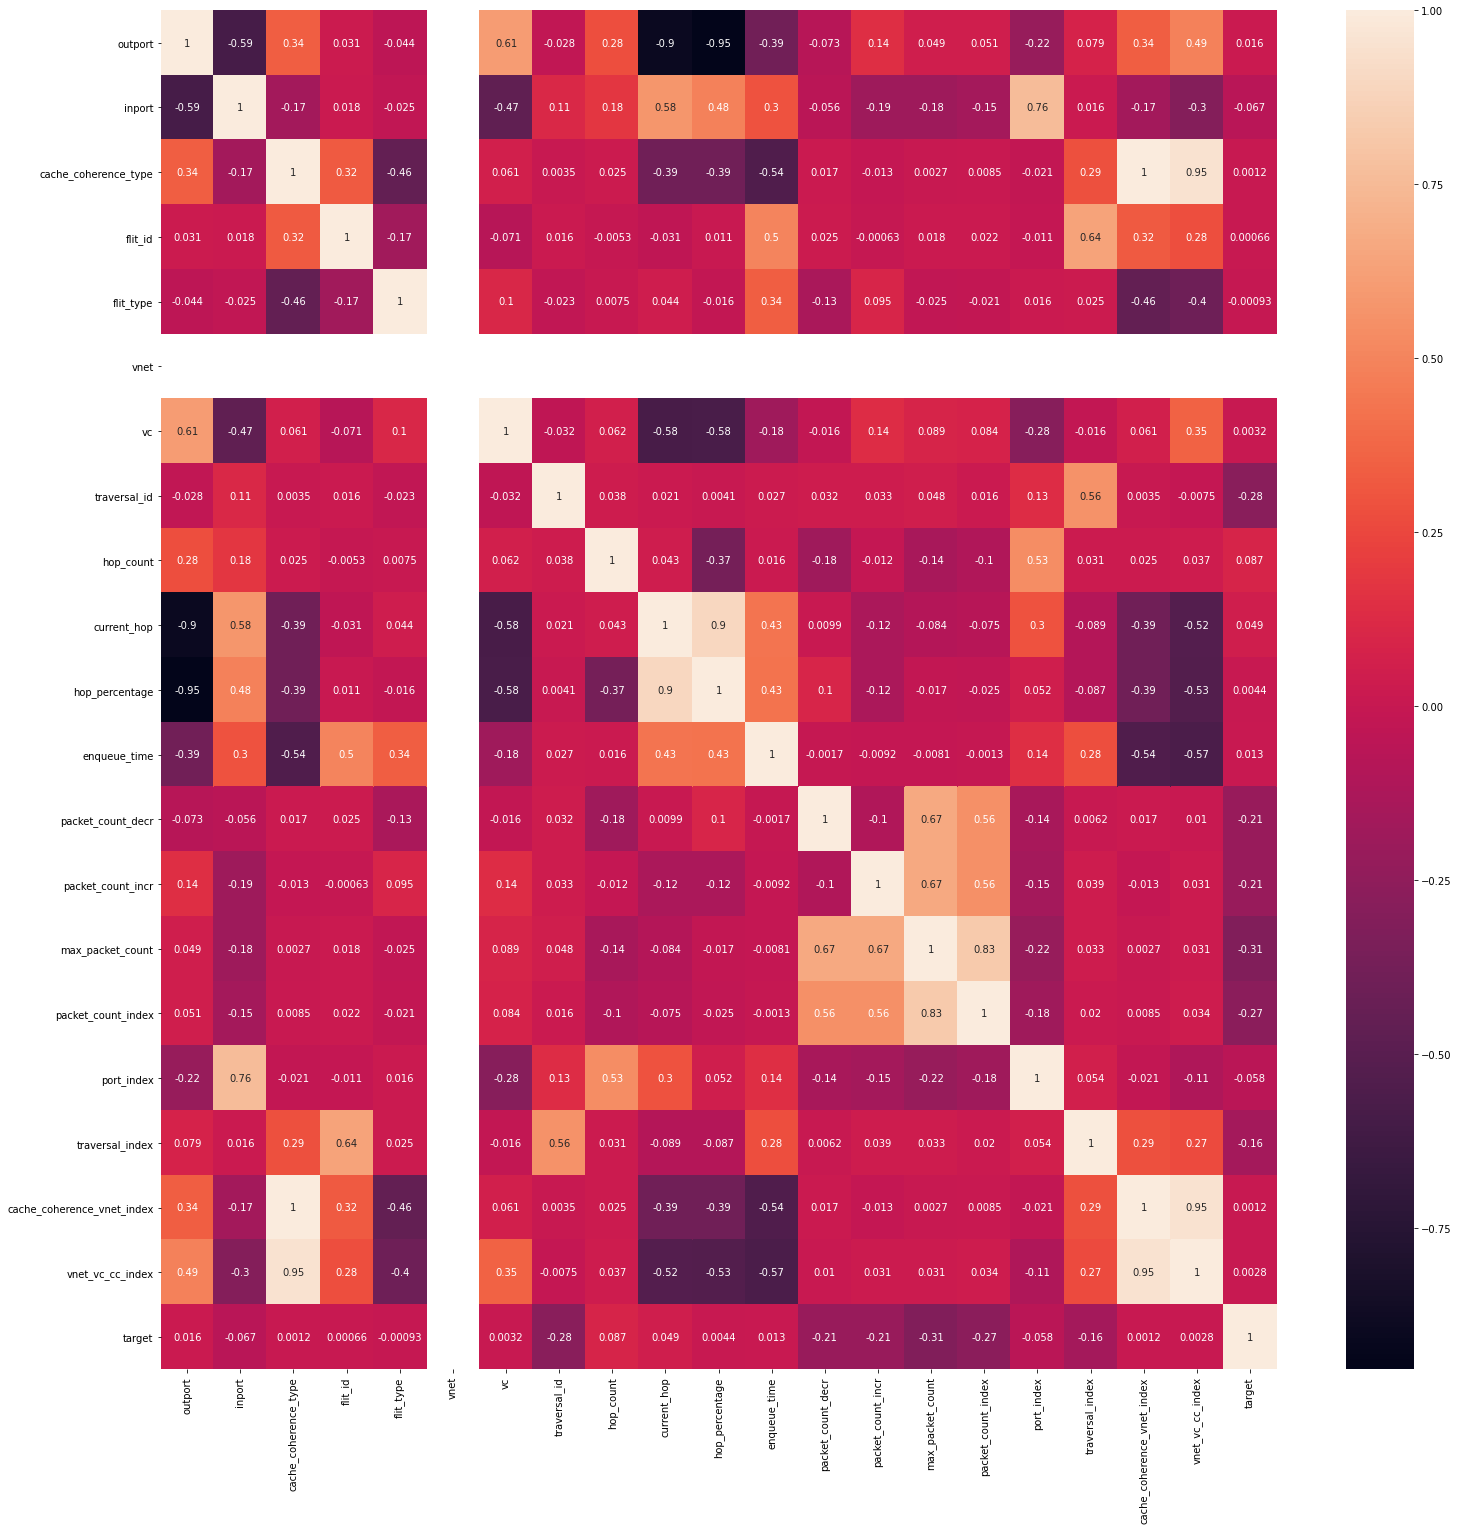

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['outport', 'vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

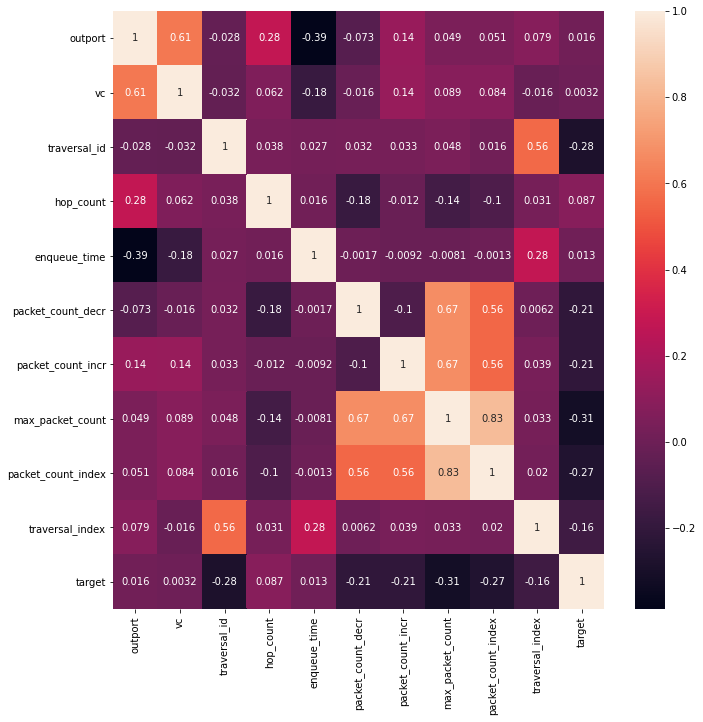

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

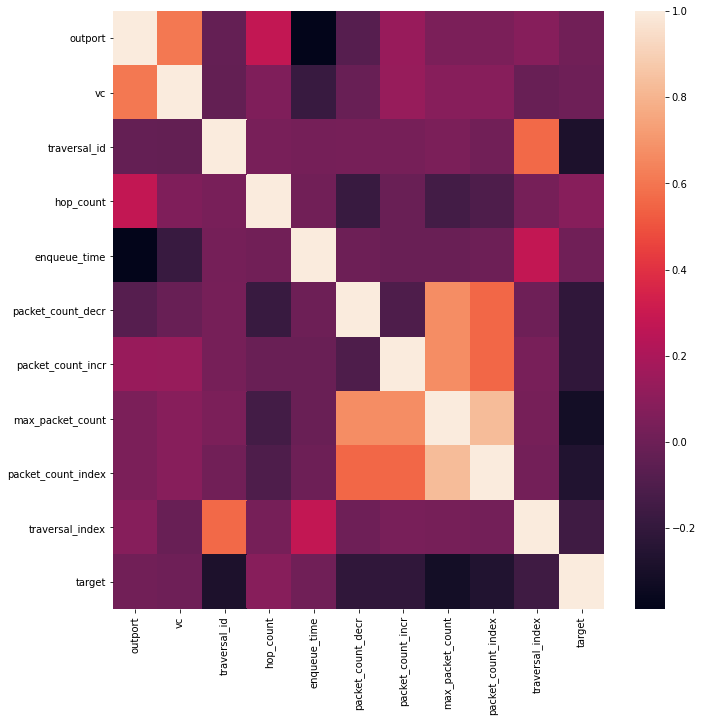

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.25,0.000000,0.000017,0.25,0.140351,0.038168,0.000000,0.038168,0.001131,7.383171e-07
1,0.25,0.333333,0.000000,0.50,0.210526,0.030534,0.007634,0.038168,0.002036,0.000000e+00
2,0.25,0.000000,0.000000,0.50,0.210526,0.015267,0.000000,0.015267,0.000452,0.000000e+00
3,0.25,0.000000,0.000365,0.25,0.140351,0.022901,0.015267,0.038168,0.002488,1.624298e-05
4,0.25,0.000000,0.000266,0.50,0.210526,0.007634,0.007634,0.015267,0.000679,1.181307e-05
...,...,...,...,...,...,...,...,...,...,...
89174,1.00,0.666667,0.999718,0.50,0.491228,0.015267,0.091603,0.106870,0.008595,8.888969e-02
89175,0.25,1.000000,0.999701,0.25,0.035088,0.007634,0.099237,0.106870,0.006107,3.111106e-01
89176,0.00,0.000000,0.999718,0.50,0.350877,0.000000,0.106870,0.106870,0.003167,1.333349e-01
89177,0.25,0.000000,0.999967,0.75,0.175439,0.007634,0.000000,0.007634,0.000226,3.111933e-01


In [20]:
train_X[train_X.duplicated()].shape

(6, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.25,0.000000,0.000017,0.25,0.142857,0.036145,0.000000,0.036145,0.000850,7.379616e-07
1,0.25,0.333333,0.000000,0.50,0.214286,0.030120,0.006024,0.036145,0.001559,0.000000e+00
2,0.25,0.000000,0.000332,0.25,0.142857,0.024096,0.012048,0.036145,0.001984,1.475923e-05
3,0.25,0.000000,0.000382,0.50,0.214286,0.018072,0.018072,0.036145,0.002126,1.697312e-05
4,0.25,0.000000,0.000631,0.25,0.142857,0.012048,0.024096,0.036145,0.001984,2.804254e-05
...,...,...,...,...,...,...,...,...,...,...
53839,1.00,0.666667,0.999718,0.50,0.500000,0.012048,0.012048,0.024096,0.001134,8.888969e-02
53840,0.25,1.000000,0.999701,0.25,0.035714,0.006024,0.018072,0.024096,0.000992,3.111106e-01
53841,0.00,0.000000,0.999718,0.50,0.357143,0.000000,0.024096,0.024096,0.000567,1.333349e-01
53842,0.25,0.000000,0.999967,0.75,0.178571,0.006024,0.000000,0.006024,0.000142,3.111933e-01


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    54866
1    34313
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs       Score
2        traversal_id  853.648165
7    max_packet_count  707.561939
8  packet_count_index  662.855164
6   packet_count_incr  356.381172
5   packet_count_decr  351.186031
9     traversal_index  282.752227
3           hop_count   66.163603
0             outport    6.468369
4        enqueue_time    1.610401
1                  vc    0.161431


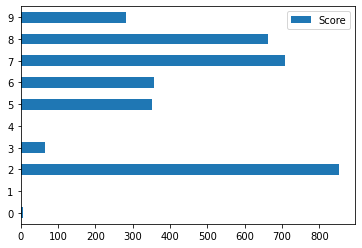

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.0953656128136
Test Prediction Score 96.90451919809718


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 72.77505385929723
Test Prediction Score 79.70710916012459
Test Prediction Score 77.97982667992612
Test Prediction Score 78.31870706428941
Test Prediction Score 71.55228360509452


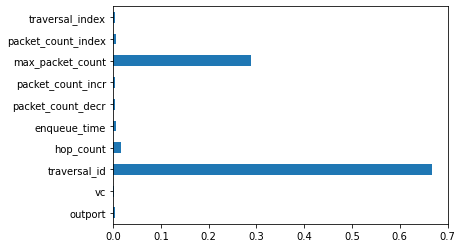

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

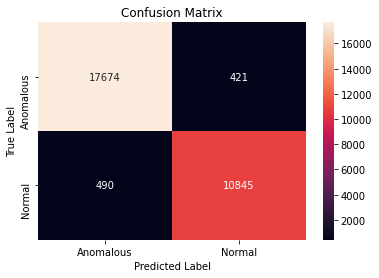

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18095
           1       0.96      0.96      0.96     11335

    accuracy                           0.97     29430
   macro avg       0.97      0.97      0.97     29430
weighted avg       0.97      0.97      0.97     29430



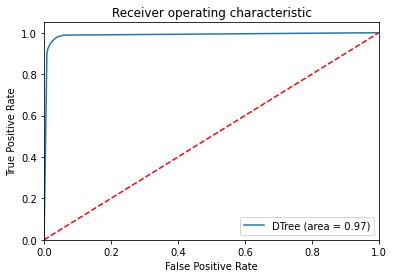

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r3l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.9966526636429
Test Prediction Score 99.41896024464832


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 77.80068345590966
Test Prediction Score 82.49940802535473
Test Prediction Score 78.68203681529438
Test Prediction Score 81.55501727355757
Test Prediction Score 73.42216273221383


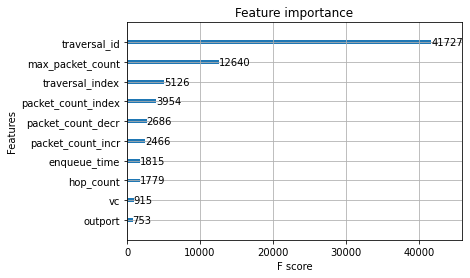

In [47]:
plot_importance(xgbc)
plt.show()

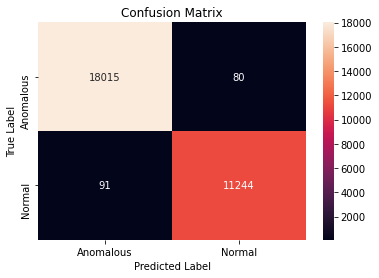

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18095
           1       0.99      0.99      0.99     11335

    accuracy                           0.99     29430
   macro avg       0.99      0.99      0.99     29430
weighted avg       0.99      0.99      0.99     29430



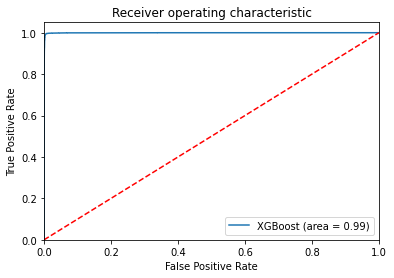

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()